In [1]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report

You should consider upgrading via the 'C:\Users\Ut1\.julia\conda\3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Ut1\.julia\conda\3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Ut1\.julia\conda\3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Ut1\.julia\conda\3\python.exe -m pip install --upgrade pip' command.


# Importo i dataset di train e test

In [2]:
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")
#controllo che non ci siano valori nulli all'interno del dataset
train_dataset.info()
train_dataset.isna().sum()
test_dataset.info()
test_dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Exited           6400 non-null   int64  
 1   RowNumber        6400 non-null   int64  
 2   CustomerId       6400 non-null   int64  
 3   Surname          6400 non-null   object 
 4   CreditScore      6400 non-null   int64  
 5   Geography        6400 non-null   object 
 6   Gender           6400 non-null   object 
 7   Age              6400 non-null   int64  
 8   Tenure           6400 non-null   int64  
 9   Balance          6400 non-null   float64
 10  NumOfProducts    6400 non-null   int64  
 11  HasCrCard        6400 non-null   int64  
 12  IsActiveMember   6400 non-null   int64  
 13  EstimatedSalary  6400 non-null   float64
dtypes: float64(2), int64(9), object(3)
memory usage: 700.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total

Exited             0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

# Fase di preprocessamento

In [3]:
#CustomerId RowNumber hanno solo valori univoci per cui non vanno a influenzare 'Exited', si possono droppare
train_dataset = train_dataset.drop('CustomerId', axis=1)
test_dataset = test_dataset.drop('CustomerId', axis=1)

train_dataset = train_dataset.drop('RowNumber', axis=1)
test_dataset = test_dataset.drop('RowNumber', axis=1)

# Fase di encoding

In [4]:
#effettuo l'encoding degli attributi che non sono numerici con label encoding
features_to_encode = ['Gender', 'Surname', 'Geography']

In [5]:
labelEncoder1 = LabelEncoder()
for feature in features_to_encode:
    train_dataset[feature] = labelEncoder1.fit_transform(train_dataset[feature])

for feature in features_to_encode:
    test_dataset[feature] = labelEncoder1.fit_transform(test_dataset[feature])    

# Fase di analisi

<AxesSubplot:>

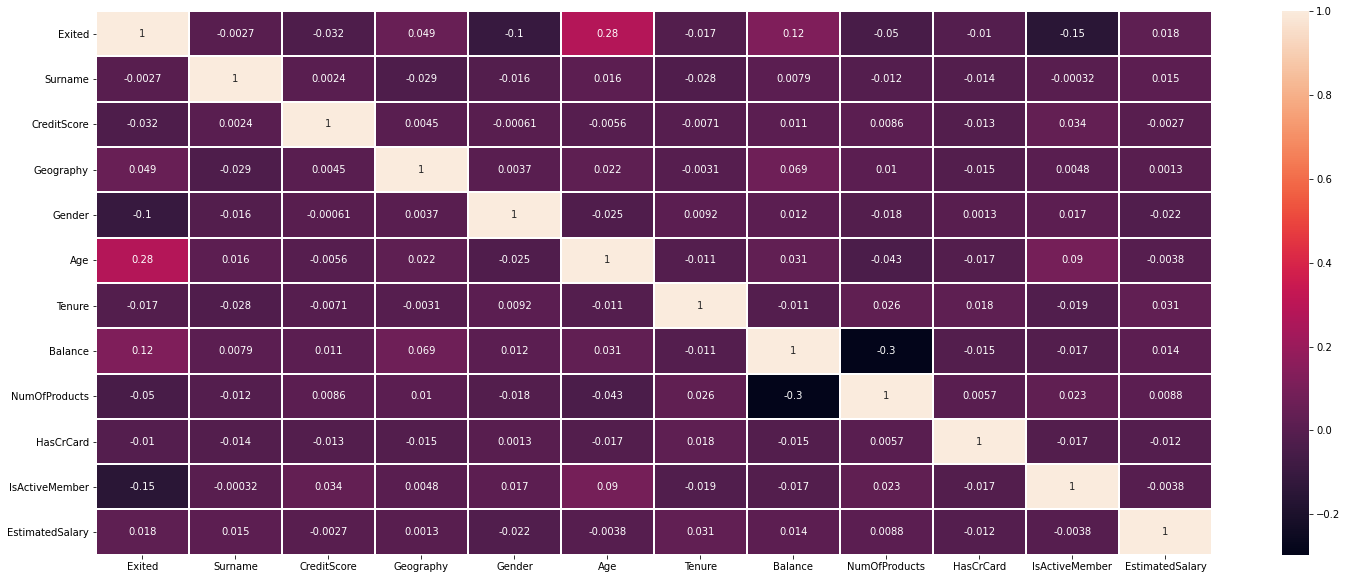

In [6]:
#Creo la heatmap per vedere le correlazioni tra le feature
plt.figure(figsize=(25,10))
correlation = train_dataset.corr()
sns.heatmap(correlation, annot = True, linewidth = 2)

Si può notare che le feature con bassa correlazione con Exited possono essere: Surname, HasCrCard, Tenure. 

In [7]:
#Per quanto riguarda Surname, si può vedere che esistono moltissimi valori univoci, più di un terzo dei valori totali, si può quindi droppare la feature senza avere ripercussioni su Exited
train_dataset['Surname'].nunique()
train_dataset = train_dataset.drop('Surname', axis=1)
test_dataset = test_dataset.drop('Surname', axis=1)

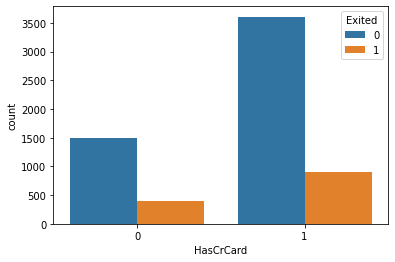

In [8]:
#Per HasCrCard utilizzo una countplot per vedere la sua influenza sui valori di Exited
sns.countplot(x="HasCrCard", hue="Exited", data=train_dataset)
plt.show()

Dal grafico si intuisce che non è una feature particolarmente rilevante in quanto le proporzioni tra valori diversi di Exited rimangono molto simili al variare di HasCrCard, si può quindi decidere di dropparla.

In [9]:
train_dataset = train_dataset.drop('HasCrCard', axis=1)
test_dataset = test_dataset.drop('HasCrCard', axis=1)

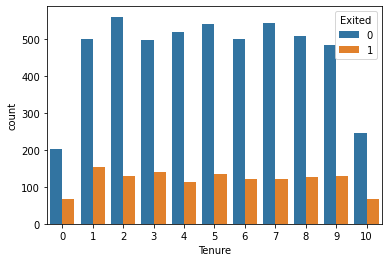

In [10]:
#Faccio la stessa cosa anche per Tenure
sns.countplot(x="Tenure", hue="Exited", data=train_dataset)
plt.show()

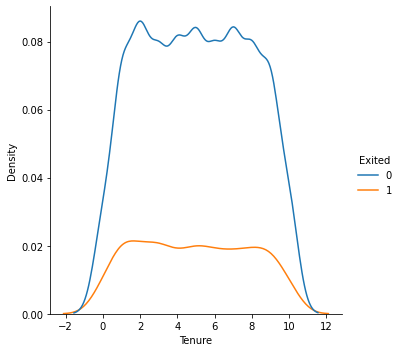

In [11]:
#Siccome il risultato non è immediatamente chiaro eseguo anche una displot
sns.displot(x="Tenure", hue="Exited", data=train_dataset, kind="kde")
plt.show()

Dai due grafici si intuisce che per valori da 1 a 9 di Tenure, Exited rimane pressocché costante, per Tenure pari a 1 e 10 invece la proporzione è meno omogenea. Siccome comunque la gran maggioranza dei valori di Tenure non influisce particolarmente su Exited si può comunque decidere di dropparla.

In [12]:
train_dataset = train_dataset.drop('Tenure', axis=1)
test_dataset = test_dataset.drop('Tenure', axis=1)

A questo punto si nota dalla heatmap che due feature sono particolarmente correlate fra di loro, Balance e NumOfProducts. Tra le due Balance risulta essere molto più correlata a Exited rispetto a NumOfProducts, per cui si potrebbe pensare di droppare quest'ultima.

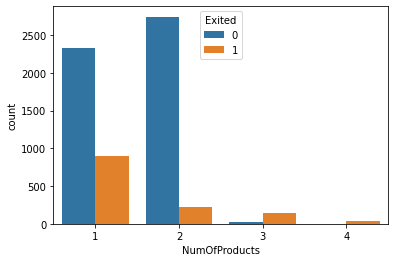

In [13]:
#Per verificare ciò controllo countplot e displot di NumOfProducts
sns.countplot(x="NumOfProducts", hue="Exited", data=train_dataset)
plt.show()

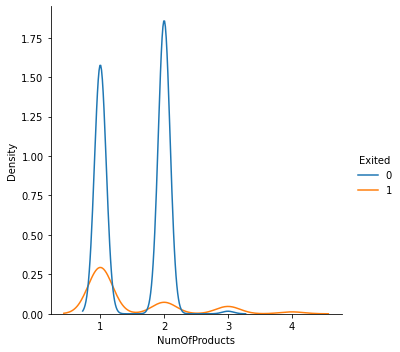

In [14]:
sns.displot(x="NumOfProducts", hue="Exited", data=train_dataset, kind="kde")
plt.show()

In realtà dai grafici si evince che il valore di Exited varia considerevolmente al variare di NumOfProducts, per cui non sembra essere produttivo dropparla, tantomeno Balance data la sua correlazione maggiore con Exited, si mantengono quindi entrambe nonostante la loro correlazione.

# Fase di Training

In [15]:
#Per il training utilizzo come classificatore un albero di decisione e controllo il valore di accuracy ottenuto
y_train = train_dataset.Exited          
X_train = train_dataset.drop(['Exited'], axis=1)  

y_test = test_dataset.Exited         
X_test = test_dataset.drop(['Exited'], axis=1)

In [16]:

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


y_pred = tree.predict(X_test)
accuracy_lr = tree.score(X_test,y_test)

print(tree)
print('\n')
print("Accuracy: {:.3f}%".format(accuracy_lr*100))

DecisionTreeClassifier()


Accuracy: 77.062%


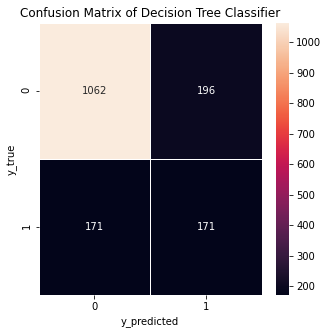




              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1258
           1       0.47      0.50      0.48       342

    accuracy                           0.77      1600
   macro avg       0.66      0.67      0.67      1600
weighted avg       0.78      0.77      0.77      1600






In [17]:
#Utilizzo una confusion matrix per controllare il numero di errori compiuti, verificando i valori di precision e recall ottenuti
print('\n')
cm_lr = confusion_matrix(y_test,tree.predict(X_test))
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.show()
print('\n\n')
print(classification_report(y_test,y_pred))
print('\n\n')

Il valore di Accuracy di circa 77% non è particolarmente soddisfacente, infatti per Exited pari a 1 vi è un numero molto simile di previsioni corrette ed errate, il che non si può considerare come un buon risultato, la precision e la recall teoricamente possono essere considerati accettabili anche se si può fare di meglio (0.86 e 0.84). Per Exited pari a 0 invece almeno il numero di previsioni corrette rispetto a quelle errate va molto bene (1062 contro 171).

Scelgo di controllare anche con Random Forest per vedere se la situazione migliora. In Random Forest vengono generati una serie di Decision Tree durante il training e il risultato finale dato dal classificatore corrisponde al risultato scelto dalla maggior parte dei Decision Tree generati. Questo classificatore dovrebbe migliorare l'accuracy del modello.

In [18]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_lr = clf.score(X_test,y_test)

print(clf)
print('\n')
print("Accuracy: {:.3f}%".format(accuracy_lr*100))

RandomForestClassifier()


Accuracy: 85.250%


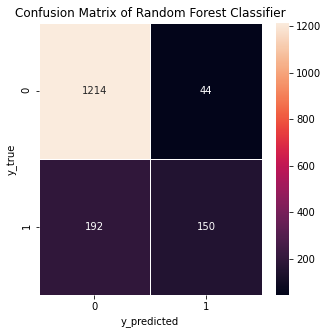




              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1258
           1       0.77      0.44      0.56       342

    accuracy                           0.85      1600
   macro avg       0.82      0.70      0.74      1600
weighted avg       0.84      0.85      0.84      1600






In [19]:
print('\n')
cm_lr = confusion_matrix(y_test,clf.predict(X_test))
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Random Forest Classifier")
plt.show()
print('\n\n')
print(classification_report(y_test,y_pred))
print('\n\n')

I risultati sono un po' migliori rispetto al Decision Tree con un 85% di accuracy, si nota che la recall sia aumentata sensibilmente (da 0.84 a 0.97) e un numero decisamente maggiore di previsioni corrette rispetto a quelle errate (150 contro 44), in questo caso quindi l'addestramento è più soddisfacente. Per Exited pari a 0 si ha ancora un buon risultato come prima (1214 corretti contro 192 errati)

I risultati ottenuti mostrano come il processo di training porti a ottimi risultati per clienti con Exited pari a 0, a differenza di quelli con Exited pari a 1 che invece riportani errori maggiori, cio in realtà era prevedibile data la proporzione che c'è tra clienti che hanno Exited pari a 0 e pari a 1, i primi in fatti sono in numero nettamente maggiore rispetto ai secondi, per cui era lecito aspettarsi che il processo di training portasse a risultati buoni per Exited=0 al contrario di Exited=1 a causa della minor presenza di dati in merito.

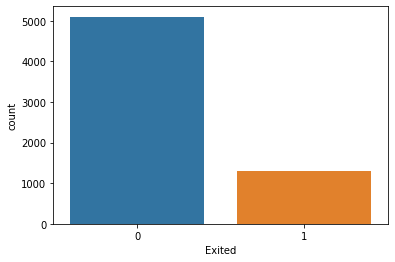

In [20]:
#Questo fatto si nota osservando la countplot di Exited
sns.countplot(x="Exited", data=train_dataset)
plt.show()

Ho provato a droppare anche NumOfProducts arrivando però a risultati ancora peggiori, circa 74% di accuracy con valori di precision e recall vicini rispettivamente a 0.40 e 0.30. 

Successivamente ho provato anche a considerare solo la differenza tra ExtimatedSalary e Balance ottenendo una feature aggiuntiva (correlata con loro due, correlata di più a Exited rispetto a ExtimatedSalary), comunque il risultato era ancora peggiore con accuracy di circa 72% e valori di precision e recall simili a quelli ottenuti droppando NumOfProducts.
La feature aggiuntiva è stata calcolata in questo modo:

train_dataset["Diff_Balance_Salary"] = train_dataset.Balance - train_dataset.EstimatedSalary
test_dataset["Diff_Balance_Salary"] = test_dataset.Balance - test_dataset.EstimatedSalary